In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [20]:
df = pd.read_csv('./mental-health/assets/35067-0001-Data.csv')
df.shape

(5001, 1000)

In [21]:
#demographic columns
demographic_columns = ['RESPID','REGION',
'HHSIZE',
'RESEX',
'AGE',
'AGECAT',
# 'AGE18_34',
# 'AGE35_49',
# 'AGE50_64',
# 'AGE65',
'EDUCAT',
# 'EDU0_11',
# 'EDU12',
# 'EDU13_15',
# 'EDU16',
'MARCAT',
# 'MAR_COH',
# 'MAR_SWD',
# 'MAR_NEV',
'EMPCAT',
# 'EMP_WORK',
# 'EMP_STU',
# 'EMP_HM',
# 'EMP_RET',
# 'EMP_OTH',
'PEREARN2',
'SPEARN2',
'OTHINC2',
'HHINCOME2',
'INCPERCAP2',
# 'INCWMH2',
'INC_CAT',
# 'INC_LO',
# 'INC_LOAVG',
# 'INC_HIAVG',
# 'INC_HI'
]
demographic_numerical_col = ['HHSIZE','AGE','RESPID']

##### Noteable columns
- T1: Know anyone killed in 9/11 atttacks
- DSM_BIPO1: DSM-IV Bipolar I Disorder (Lifetime)
- DSM_BIPO2: DSM-IV Bipolar II Disorder (Lifetime)

In [54]:
unique_identifier = ['DSM_BIPO1']
columns = demographic_columns + unique_identifier

In [23]:
demo_df = df[columns]
demo_df = demo_df.replace(-9, np.nan)
demo_df = demo_df.dropna()
demo_df.head()

,RESPID,REGION,HHSIZE,RESEX,AGE,AGECAT,EDUCAT,MARCAT,EMPCAT,PEREARN2,SPEARN2,OTHINC2,HHINCOME2,INCPERCAP2,INC_CAT,DSM_BIPO2
0,24026,3.0,1,2.0,56,3,3.0,2.0,1.0,4,0,0,4,4,3,5
1,21002,1.0,3,1.0,42,2,3.0,1.0,1.0,6,3,0,7,3,3,5
2,25596,1.0,4,1.0,43,2,3.0,1.0,1.0,4,2,0,6,2,1,5
3,22205,3.0,1,2.0,59,3,2.0,2.0,5.0,0,0,1,1,1,1,5
4,23001,3.0,2,2.0,58,3,2.0,1.0,1.0,3,5,6,8,6,4,5


In [24]:
# fintering based on unique identiffier
demo_df = demo_df[demo_df[unique_identifier[0]] == 1] # yes or endorsed
demo_df.shape

(58, 16)

In [25]:
numerical_col = ['HHSIZE','AGE','RESPID',]
categorical_col = [col for col in demo_df.columns if col not in numerical_col]
demo_df[categorical_col] = demo_df[categorical_col].astype('category')
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 156 to 4969
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RESPID      58 non-null     int64   
 1   REGION      58 non-null     category
 2   HHSIZE      58 non-null     int64   
 3   RESEX       58 non-null     category
 4   AGE         58 non-null     int64   
 5   AGECAT      58 non-null     category
 6   EDUCAT      58 non-null     category
 7   MARCAT      58 non-null     category
 8   EMPCAT      58 non-null     category
 9   PEREARN2    58 non-null     category
 10  SPEARN2     58 non-null     category
 11  OTHINC2     58 non-null     category
 12  HHINCOME2   58 non-null     category
 13  INCPERCAP2  58 non-null     category
 14  INC_CAT     58 non-null     category
 15  DSM_BIPO2   58 non-null     category
dtypes: category(13), int64(3)
memory usage: 5.6 KB


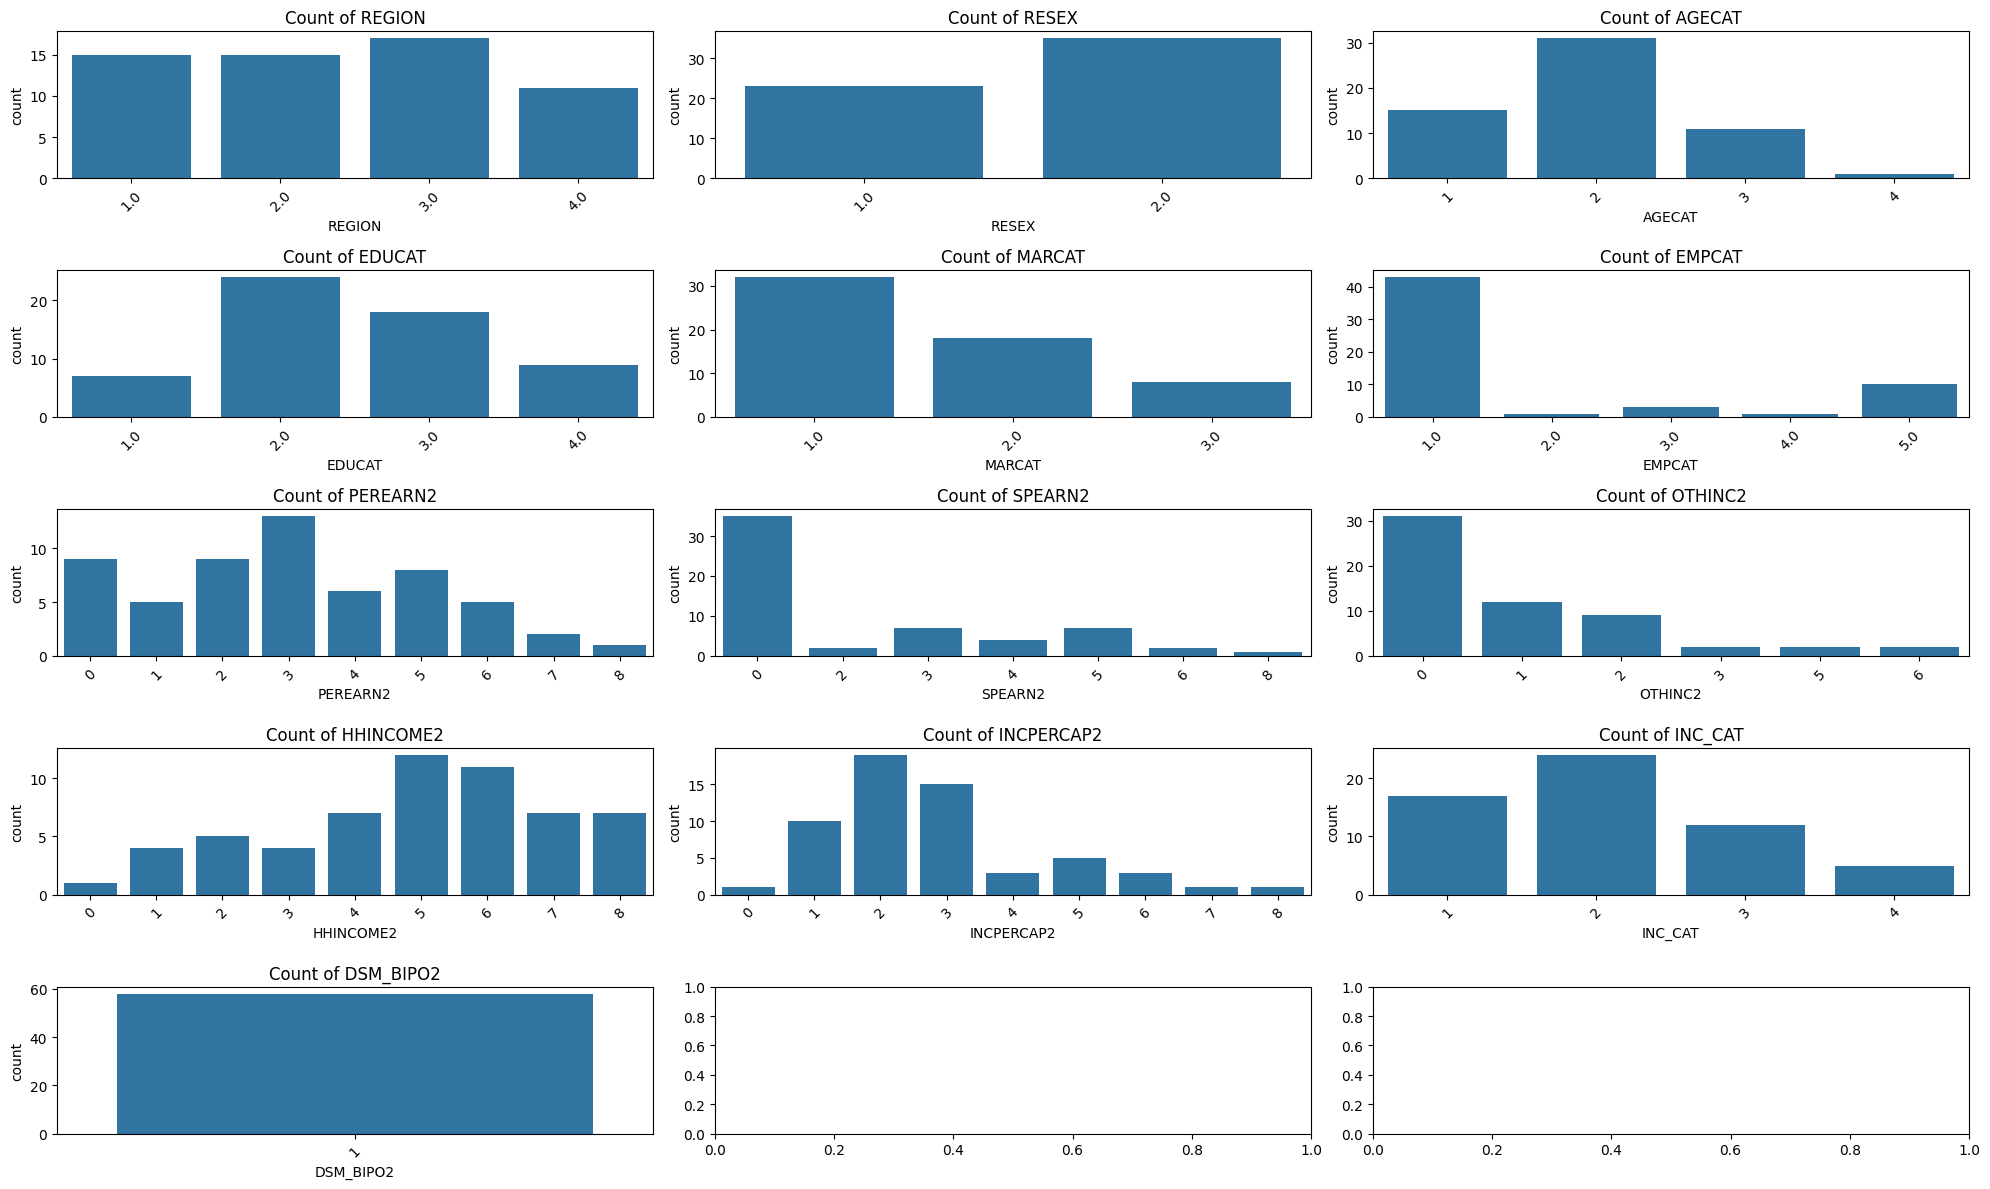

In [26]:

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_col):
    sns.countplot(x=col, data=demo_df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [53]:
#childhood columns
childhood_columns = ['CH1',
'CH1A',
'CH9',
'CH9A',
'CH13',
'CH14',
'CH16',
'CH21',
'CH22',
# 'CH23', interview checkpoint
'CH24',
'CH37A',
'CH37B',
'CH37C',
'CH37D',
'CH37E',
'CH38',
'CH38_1', #if between 12-17 and where allowed out 
'CH39',
'CH42',
'CH43',
'CH44',
'CH45',
'CH46',
'CH47_1',
'CH47_2',
'CH47_3',
'CH47_4',
'CH52',
'CH52A',
'CH60',
'CH60A',
'CH61',
'CH61A',
'CH62',
'CH74',
'CH74_1',
'CH74_2',
'CH74_2A',
'CH74_2B',
'CH74_2C',
'CH74_2D',
'CH74_2E',
'CH74_2F',
'CH75',
'CH76',
'CH76_1',
'CH76_2',
'CH76_3',
'CH76_4',
'CH81',
'CH81A',
'CH89',
'CH89A',
'CH90',
'CH90A',
'CH91',
'CH103',
'CH104',
'CH105',
'CH105A',
'CH105B',
'CH105C',
'CH105D',
'CH105E',
'CH105F']
childhood_numerical_col = ['CH13','CH14','CH16','CH21','CH22','CH24','CH38','CH43','CH45']

columns2 = demographic_columns + unique_identifier + childhood_columns
num_columns = numerical_col + childhood_numerical_col
child_df = df[columns2]

cat_columns = [col for col in child_df.columns if col not in num_columns]
child_df[cat_columns] = child_df[cat_columns].astype('category')
child_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 81 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RESPID      5001 non-null   int64   
 1   REGION      5001 non-null   category
 2   HHSIZE      5001 non-null   int64   
 3   RESEX       5001 non-null   category
 4   AGE         5001 non-null   int64   
 5   AGECAT      5001 non-null   category
 6   EDUCAT      5001 non-null   category
 7   MARCAT      5001 non-null   category
 8   EMPCAT      5001 non-null   category
 9   PEREARN2    5001 non-null   category
 10  SPEARN2     5001 non-null   category
 11  OTHINC2     5001 non-null   category
 12  HHINCOME2   5001 non-null   category
 13  INCPERCAP2  5001 non-null   category
 14  INC_CAT     5001 non-null   category
 15  DSM_BIPO1   5001 non-null   category
 16  CH1         5001 non-null   category
 17  CH1A        5001 non-null   category
 18  CH9         5001 non-null   category
 19  CH9A  

/var/folders/cb/97h05k115pq99d_0k1h0h0yh0000gn/T/ipykernel_62139/1881165913.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_df[cat_columns] = child_df[cat_columns].astype('category')


In [49]:
child_df
child_df = child_df.replace(-9, np.nan)
child_df = child_df.dropna()
child_df.shape

/var/folders/cb/97h05k115pq99d_0k1h0h0yh0000gn/T/ipykernel_62139/1898006307.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  child_df = child_df.replace(-9, np.nan)


(4959, 81)

In [55]:
X = child_df.drop(columns=['DSM_BIPO1'])
y = child_df['DSM_BIPO1']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.13      0.61      0.21        56
           5       0.97      0.76      0.85       945

    accuracy                           0.75      1001
   macro avg       0.55      0.68      0.53      1001
weighted avg       0.92      0.75      0.81      1001

